In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fastai import *
from fastai.tabular import *

In [3]:
path = Path('data').absolute()
path.ls()

[PosixPath('/home/lgvaz/projects/tabular/house_prices/data/data_description.txt'),
 PosixPath('/home/lgvaz/projects/tabular/house_prices/data/train.csv'),
 PosixPath('/home/lgvaz/projects/tabular/house_prices/data/models'),
 PosixPath('/home/lgvaz/projects/tabular/house_prices/data/sample_submission.csv'),
 PosixPath('/home/lgvaz/projects/tabular/house_prices/data/house-prices-advanced-regression-techniques.zip'),
 PosixPath('/home/lgvaz/projects/tabular/house_prices/data/sub.csv'),
 PosixPath('/home/lgvaz/projects/tabular/house_prices/data/test.csv')]

In [4]:
df = pd.read_csv(path/'train.csv')
df_test = pd.read_csv(path/'test.csv')
df_sample = pd.read_csv(path/'sample_submission.csv')

In [5]:
dep_var = 'SalePrice'
cont_names = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']
cat_names = list(set(df.columns) - set(cont_names + [dep_var, 'Id']))
procs = [FillMissing, Categorify, Normalize]

In [20]:
dep_var = 'SalePrice'
cat_names = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
           'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
           'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
           'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
           'Electrical', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
           'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'BsmtQual', 'KitchenQual']
cont_names = ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr',
 'EnclosedPorch', 'Fireplaces', 'FullBath',
 'GarageYrBlt', 'GrLivArea',
 'HalfBath', 'KitchenAbvGr', 
 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea',
 'OpenPorchSF', 'PoolArea', 'ScreenPorch',
 'TotRmsAbvGrd', 'WoodDeckSF']
procs = [FillMissing, Categorify, Normalize]

In [6]:
for name in cont_names:
    df_test[name].fillna(value=df[name].mean(), inplace=True)

In [7]:
test = TabularList.from_df(df=df_test, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
data = (TabularList.from_df(df=df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
#         .split_by_idx(list(range(1200, 1460)))
        .split_by_rand_pct(0.1, seed=42)
        .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
        .add_test(test)
        .databunch())

In [8]:
max_log_y = np.log(np.max(df[dep_var]) * 1.2)
y_range = [0, max_log_y]

In [76]:
learn = tabular_learner(data, layers=[500, 300], metrics=[root_mean_squared_error], y_range=y_range, ps=0.2, wd=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


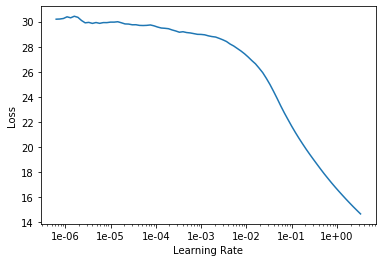

In [10]:
learn.lr_find()
learn.recorder.plot()

In [96]:
learn.fit_one_cycle(15, 1e-6)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.012257,0.018775,0.132462,00:01
1,0.012374,0.018218,0.130681,00:01
2,0.011867,0.018950,0.133152,00:01
3,0.012725,0.018445,0.131504,00:01
4,0.013225,0.018284,0.130878,00:01
5,0.013318,0.018320,0.130925,00:01
6,0.012562,0.018429,0.131373,00:01
7,0.012077,0.018043,0.130356,00:01
8,0.011809,0.018133,0.130682,00:01
9,0.011336,0.018219,0.130842,00:01


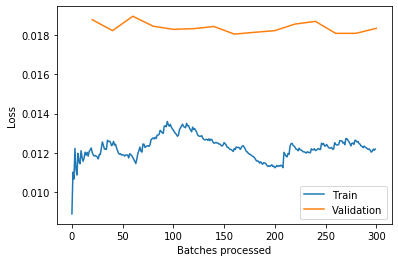

In [97]:
learn.recorder.plot_losses()

In [93]:
learn.save('500-300-013')

In [77]:
learn.load('500-300-013')

Learner(data=TabularDataBunch;

Train: LabelList (1314 items)
x: TabularList
HouseStyle 2Story; Foundation PConc; BldgType 1Fam; BsmtFinType2 Unf; ExterCond TA; Alley #na#; OverallCond 5; MSZoning RL; PavedDrive Y; Exterior2nd VinylSd; Exterior1st VinylSd; Heating GasA; FullBath 2; LandSlope Gtl; BsmtCond TA; GarageQual TA; MasVnrType BrkFace; Functional Typ; KitchenQual Gd; FireplaceQu #na#; CentralAir Y; GarageFinish RFn; ExterQual Gd; SaleType WD; LowQualFinSF 0; Fence #na#; BsmtQual Gd; Condition1 Norm; PoolQC #na#; GarageType Attchd; BsmtHalfBath 0; BsmtFullBath 1; Utilities AllPub; GarageCond TA; RoofStyle Gable; Street Pave; SaleCondition Normal; GarageCars 2; MiscFeature #na#; MoSold 2; GrLivArea 1710; HeatingQC Ex; LandContour Lvl; Electrical SBrkr; LotShape Reg; BsmtExposure No; RoofMatl CompShg; Neighborhood CollgCr; BsmtFinType1 GLQ; HalfBath 1; Condition2 Norm; LotConfig Inside; LotFrontage_na False; MasVnrArea_na False; GarageYrBlt_na False; MSSubClass 0.0604; LotFrontage

In [94]:
# Create submission
preds, _ = learn.get_preds(ds_type=DatasetType.Test)
sub_path = path/'sub.csv'
print(sub_path.absolute())
df_sub = pd.DataFrame(data=preds.exp().tolist(), columns=[dep_var])
df_sub['Id'] = df_test['Id']
df_sub = df_sub[['Id', dep_var]]
df_sub.to_csv(path/'sub.csv', index=False)

/home/lgvaz/projects/tabular/house_prices/data/sub.csv


In [98]:
!~/.local/bin/kaggle competitions submit house-prices-advanced-regression-techniques -f /home/lgvaz/projects/tabular/house_prices/data/sub.csv -m "500-300-013"

100%|██████████████████████████████████████| 25.8k/25.8k [00:04<00:00, 5.47kB/s]
Successfully submitted to House Prices: Advanced Regression Techniques